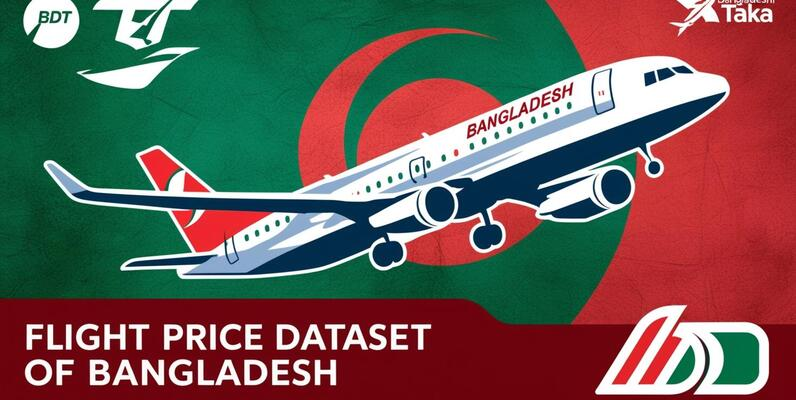

In [1]:
#Import the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("/content/Flight_Price_Dataset_of_Bangladesh.csv")
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [3]:
#Check for missing values
df.isnull().sum()

,0
Airline,0
Source,0
Source Name,0
Destination,0
Destination Name,0
Departure Date & Time,0
Arrival Date & Time,0
Duration (hrs),0
Stopovers,0
Aircraft Type,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [5]:
# Convert Date Columns to Datetime Format
df['Departure Date & Time'] = pd.to_datetime(df['Departure Date & Time'])
df['Arrival Date & Time'] = pd.to_datetime(df['Arrival Date & Time'])
# Create new useful time-based features
df['Departure Hour'] = df['Departure Date & Time'].dt.hour
df['Departure Minute'] = df['Departure Date & Time'].dt.minute
df['Arrival Hour'] = df['Arrival Date & Time'].dt.hour
df['Arrival Minute'] = df['Arrival Date & Time'].dt.minute
#Convert the Flight duration from Hr to Mins
df['Flight Duration (Minutes)'] = df['Duration (hrs)'] * 60
df.drop(columns=['Departure Date & Time', 'Arrival Date & Time', 'Duration (hrs)'], inplace=True)
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes)
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,6,25,7,38,73.171587
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,0,17,0,53,36.518281
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,12,3,14,44,161.379033
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,3,21,4,2,41.163219
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,9,14,23,17,843.336554


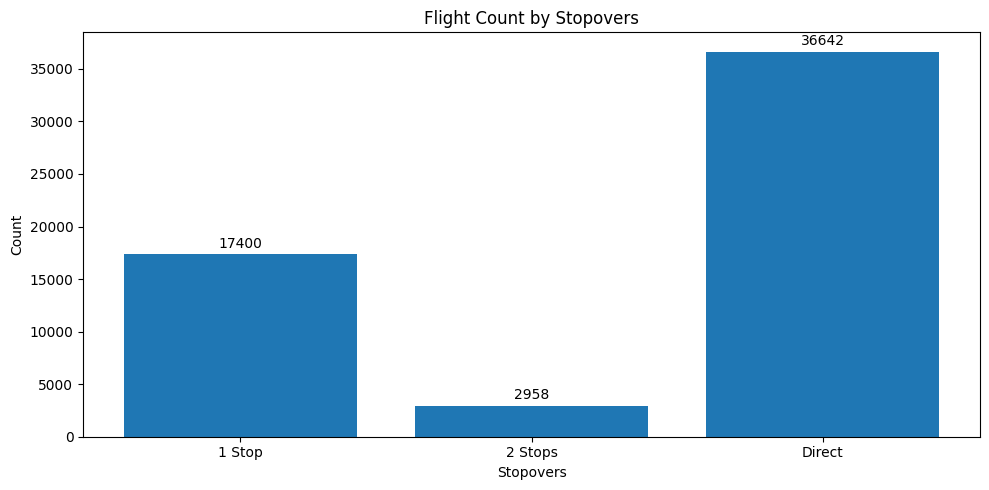

In [6]:
# Count by encoded values
stopover_counts = df['Stopovers'].value_counts().sort_index()
# Bar Plot
plt.figure(figsize = (10, 5))
plt.bar(stopover_counts.index, stopover_counts.values)
plt.xlabel("Stopovers")
plt.ylabel("Count")
plt.title("Flight Count by Stopovers")
# Add count labels on top of each bar (optional but nice)
for i, val in enumerate(stopover_counts.values):
    plt.text(i, val + 300, str(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [7]:
#Encoding the Stop-over feature
df['Stopovers'] = df['Stopovers'].map({"Direct":0, "1 Stop": 1, "2 Stops":2})
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes)
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,0,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,6,25,7,38,73.171587
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",0,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,0,17,0,53,36.518281
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,1,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,12,3,14,44,161.379033
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",0,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,3,21,4,2,41.163219
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,1,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,9,14,23,17,843.336554


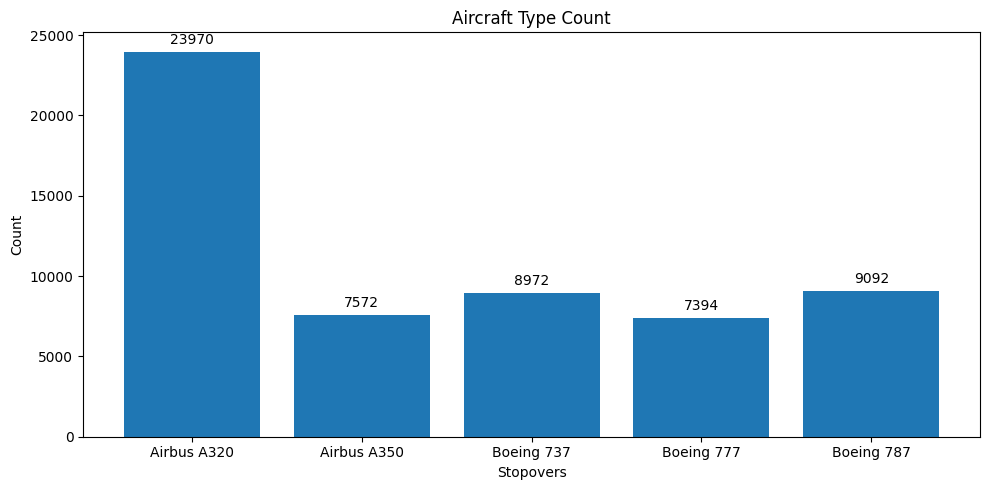

In [8]:
df["Aircraft Type"].value_counts()
# Count by encoded values
air_counts = df['Aircraft Type'].value_counts().sort_index()
# Bar Plot
plt.figure(figsize = (10, 5))
plt.bar(air_counts.index, air_counts.values)
plt.xlabel("Stopovers")
plt.ylabel("Count")
plt.title("Aircraft Type Count")
# Add count labels on top of each bar (optional but nice)
for i, val in enumerate(air_counts.values):
    plt.text(i, val + 300, str(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Airline', 'Source', 'Destination', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes)
0,14,2,Cox's Bazar Airport,2,Netaji Subhas Chandra Bose International Airpo...,0,0,1,1,21131.225021,5169.683753,26300.908775,2,10,6,25,7,38,73.171587
1,6,0,Barisal Airport,3,"Shah Amanat International Airport, Chittagong",0,0,2,2,11605.395471,200.000000,11805.395471,2,14,0,17,0,53,36.518281
2,5,7,"Osmani International Airport, Sylhet",13,Kuala Lumpur International Airport,1,4,1,2,39882.499349,11982.374902,51864.874251,3,83,12,3,14,44,161.379033
3,18,5,"Shah Makhdum Airport, Rajshahi",5,"Hazrat Shahjalal International Airport, Dhaka",0,0,1,0,4435.607340,200.000000,4635.607340,2,56,3,21,4,2,41.163219
4,5,6,Saidpur Airport,18,Toronto Pearson International Airport,1,1,0,0,59243.806146,14886.570922,74130.377068,2,90,9,14,23,17,843.336554


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Airline                    57000 non-null  int64  
 1   Source                     57000 non-null  int64  
 2   Source Name                57000 non-null  object 
 3   Destination                57000 non-null  int64  
 4   Destination Name           57000 non-null  object 
 5   Stopovers                  57000 non-null  int64  
 6   Aircraft Type              57000 non-null  int64  
 7   Class                      57000 non-null  int64  
 8   Booking Source             57000 non-null  int64  
 9   Base Fare (BDT)            57000 non-null  float64
 10  Tax & Surcharge (BDT)      57000 non-null  float64
 11  Total Fare (BDT)           57000 non-null  float64
 12  Seasonality                57000 non-null  int64  
 13  Days Before Departure      57000 non-null  int

In [12]:
df = pd.get_dummies(df, columns=label_cols, drop_first=True)
df.head()

,Source Name,Destination Name,Stopovers,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,...,Aircraft Type_2,Aircraft Type_3,Aircraft Type_4,Class_1,Class_2,Booking Source_1,Booking Source_2,Seasonality_1,Seasonality_2,Seasonality_3
0,Cox's Bazar Airport,Netaji Subhas Chandra Bose International Airpo...,0,21131.225021,5169.683753,26300.908775,10,6,25,7,...,False,False,False,True,False,True,False,False,True,False
1,Barisal Airport,"Shah Amanat International Airport, Chittagong",0,11605.395471,200.000000,11805.395471,14,0,17,0,...,False,False,False,False,True,False,True,False,True,False
2,"Osmani International Airport, Sylhet",Kuala Lumpur International Airport,1,39882.499349,11982.374902,51864.874251,83,12,3,14,...,False,False,True,True,False,False,True,False,False,True
3,"Shah Makhdum Airport, Rajshahi","Hazrat Shahjalal International Airport, Dhaka",0,4435.607340,200.000000,4635.607340,56,3,21,4,...,False,False,False,True,False,False,False,False,True,False
4,Saidpur Airport,Toronto Pearson International Airport,1,59243.806146,14886.570922,74130.377068,90,9,14,23,...,False,False,False,False,False,False,False,False,True,False


In [13]:
df.drop(columns=['Source Name', 'Destination Name'], inplace=True)
df.head()

,Stopovers,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes),...,Aircraft Type_2,Aircraft Type_3,Aircraft Type_4,Class_1,Class_2,Booking Source_1,Booking Source_2,Seasonality_1,Seasonality_2,Seasonality_3
0,0,21131.225021,5169.683753,26300.908775,10,6,25,7,38,73.171587,...,False,False,False,True,False,True,False,False,True,False
1,0,11605.395471,200.000000,11805.395471,14,0,17,0,53,36.518281,...,False,False,False,False,True,False,True,False,True,False
2,1,39882.499349,11982.374902,51864.874251,83,12,3,14,44,161.379033,...,False,False,True,True,False,False,True,False,False,True
3,0,4435.607340,200.000000,4635.607340,56,3,21,4,2,41.163219,...,False,False,False,True,False,False,False,False,True,False
4,1,59243.806146,14886.570922,74130.377068,90,9,14,23,17,843.336554,...,False,False,False,False,False,False,False,False,True,False


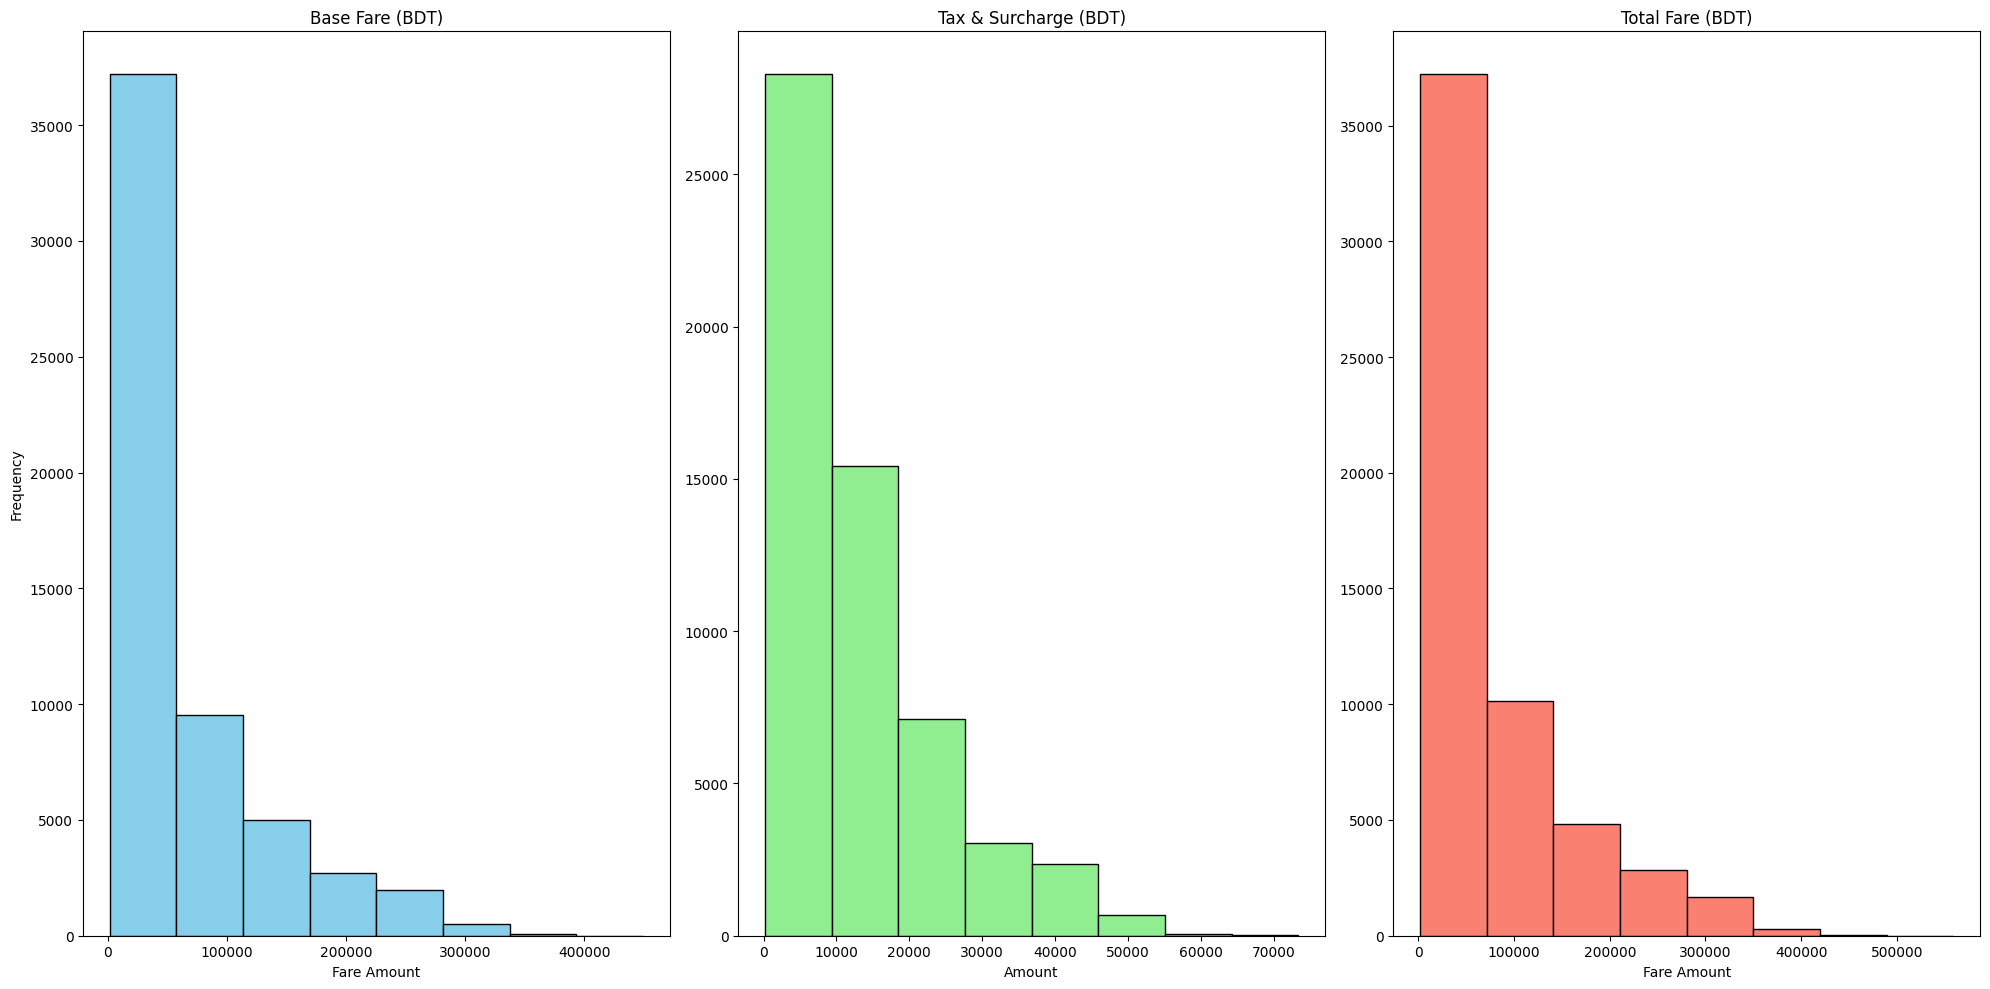

In [40]:
# Plot histograms
plt.figure(figsize=(20, 10))
# Histogram for Base Fare
plt.subplot(1, 3, 1)
plt.hist(df['Base Fare (BDT)'], bins=8, color='skyblue', edgecolor='black')
plt.title('Base Fare (BDT)')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
# Histogram for Tax & Surcharge
plt.subplot(1, 3, 2)
plt.hist(df['Tax & Surcharge (BDT)'], bins=8, color='lightgreen', edgecolor='black')
plt.title('Tax & Surcharge (BDT)')
plt.xlabel('Amount')
# Histogram for Total Fare
plt.subplot(1, 3, 3)
plt.hist(df['Total Fare (BDT)'], bins=8, color='salmon', edgecolor='black')
plt.title('Total Fare (BDT)')
plt.xlabel('Fare Amount')
plt.tight_layout()
plt.show()

In [14]:
df = df.drop_duplicates()
df.head()

,Stopovers,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes),...,Aircraft Type_2,Aircraft Type_3,Aircraft Type_4,Class_1,Class_2,Booking Source_1,Booking Source_2,Seasonality_1,Seasonality_2,Seasonality_3
0,0,21131.225021,5169.683753,26300.908775,10,6,25,7,38,73.171587,...,False,False,False,True,False,True,False,False,True,False
1,0,11605.395471,200.000000,11805.395471,14,0,17,0,53,36.518281,...,False,False,False,False,True,False,True,False,True,False
2,1,39882.499349,11982.374902,51864.874251,83,12,3,14,44,161.379033,...,False,False,True,True,False,False,True,False,False,True
3,0,4435.607340,200.000000,4635.607340,56,3,21,4,2,41.163219,...,False,False,False,True,False,False,False,False,True,False
4,1,59243.806146,14886.570922,74130.377068,90,9,14,23,17,843.336554,...,False,False,False,False,False,False,False,False,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Stopovers                  57000 non-null  int64  
 1   Base Fare (BDT)            57000 non-null  float64
 2   Tax & Surcharge (BDT)      57000 non-null  float64
 3   Total Fare (BDT)           57000 non-null  float64
 4   Days Before Departure      57000 non-null  int64  
 5   Departure Hour             57000 non-null  int32  
 6   Departure Minute           57000 non-null  int32  
 7   Arrival Hour               57000 non-null  int32  
 8   Arrival Minute             57000 non-null  int32  
 9   Flight Duration (Minutes)  57000 non-null  float64
 10  Airline_1                  57000 non-null  bool   
 11  Airline_2                  57000 non-null  bool   
 12  Airline_3                  57000 non-null  bool   
 13  Airline_4                  57000 non-null  boo

In [16]:
# Convert all boolean columns to integers (True -> 1, False -> 0)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
bool_columns = df.select_dtypes(include='bool').columns
print("Converted boolean columns to 1/0:", list(bool_columns))

Converted boolean columns to 1/0: []


In [17]:
df.head()

,Stopovers,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure,Departure Hour,Departure Minute,Arrival Hour,Arrival Minute,Flight Duration (Minutes),...,Aircraft Type_2,Aircraft Type_3,Aircraft Type_4,Class_1,Class_2,Booking Source_1,Booking Source_2,Seasonality_1,Seasonality_2,Seasonality_3
0,0,21131.225021,5169.683753,26300.908775,10,6,25,7,38,73.171587,...,0,0,0,1,0,1,0,0,1,0
1,0,11605.395471,200.000000,11805.395471,14,0,17,0,53,36.518281,...,0,0,0,0,1,0,1,0,1,0
2,1,39882.499349,11982.374902,51864.874251,83,12,3,14,44,161.379033,...,0,0,1,1,0,0,1,0,0,1
3,0,4435.607340,200.000000,4635.607340,56,3,21,4,2,41.163219,...,0,0,0,1,0,0,0,0,1,0
4,1,59243.806146,14886.570922,74130.377068,90,9,14,23,17,843.336554,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df.columns

Index(['Stopovers', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)',
       'Total Fare (BDT)', 'Days Before Departure', 'Departure Hour',
       'Departure Minute', 'Arrival Hour', 'Arrival Minute',
       'Flight Duration (Minutes)', 'Airline_1', 'Airline_2', 'Airline_3',
       'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7', 'Airline_8',
       'Airline_9', 'Airline_10', 'Airline_11', 'Airline_12', 'Airline_13',
       'Airline_14', 'Airline_15', 'Airline_16', 'Airline_17', 'Airline_18',
       'Airline_19', 'Airline_20', 'Airline_21', 'Airline_22', 'Airline_23',
       'Source_1', 'Source_2', 'Source_3', 'Source_4', 'Source_5', 'Source_6',
       'Source_7', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5', 'Destination_6', 'Destination_7',
       'Destination_8', 'Destination_9', 'Destination_10', 'Destination_11',
       'Destination_12', 'Destination_13', 'Destination_14', 'Destination_15',
       'Destination_16', 'Destination_17', 'Dest

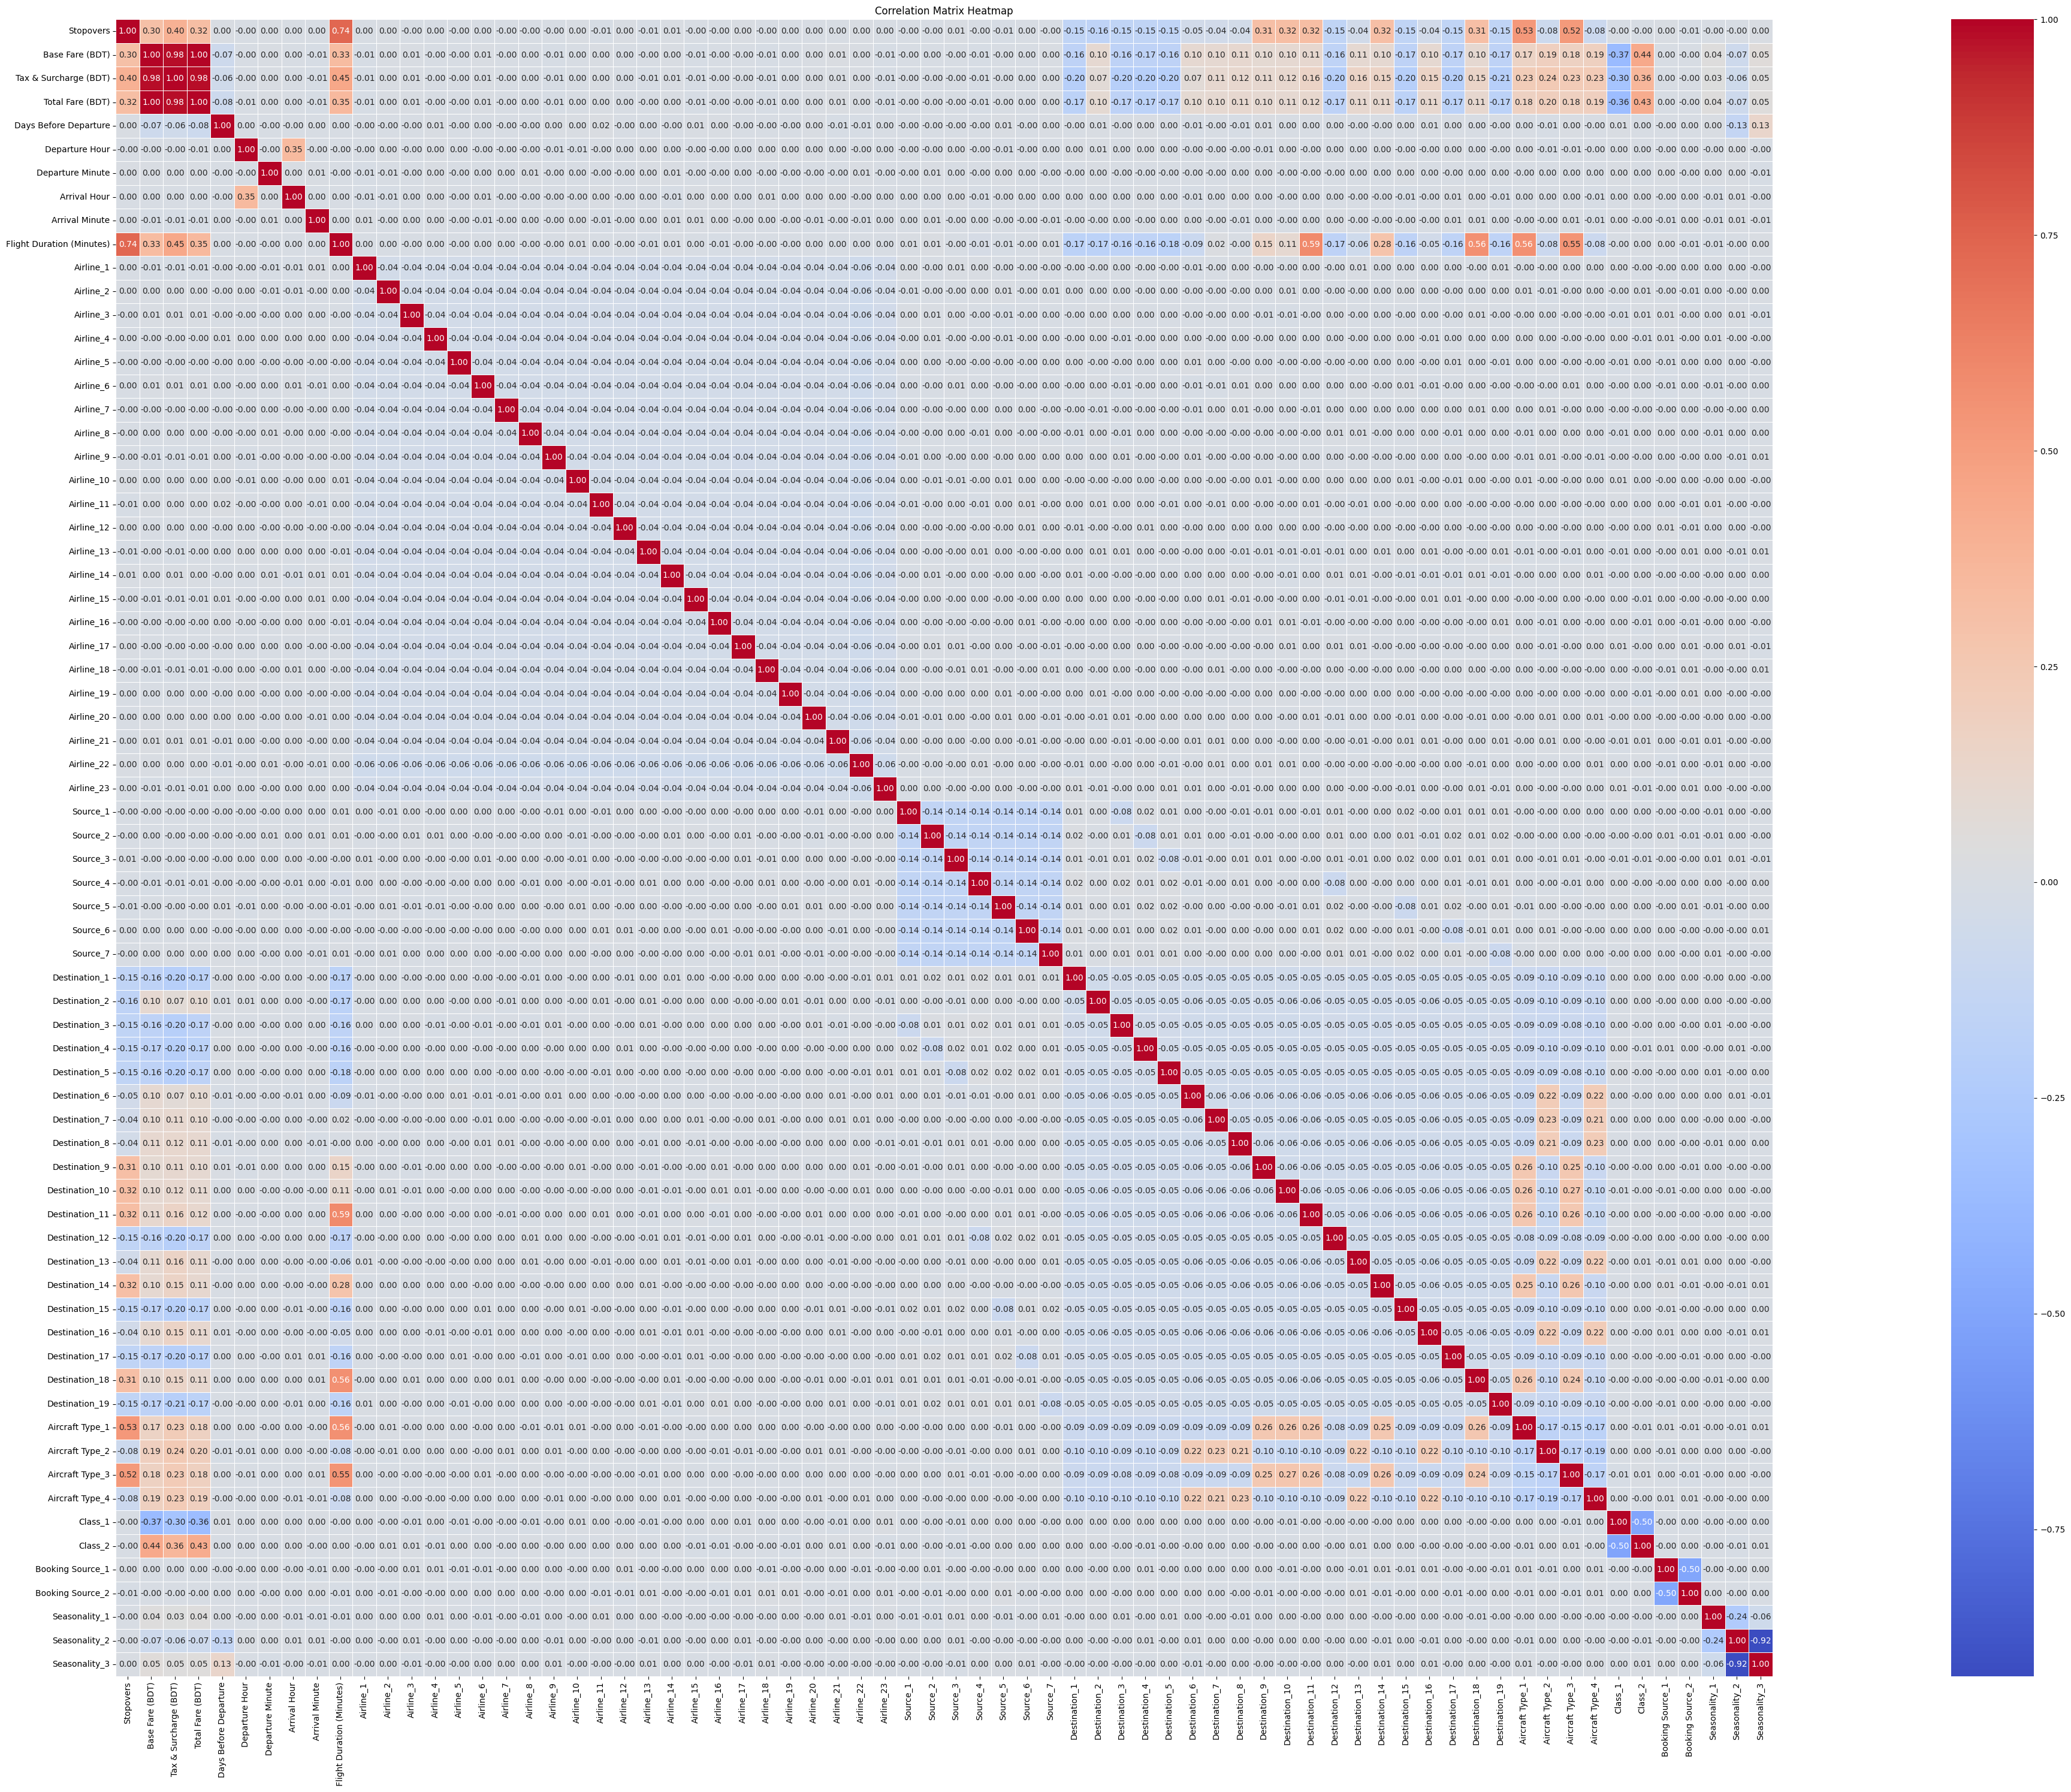

In [19]:
# Plot the heatmap
plt.figure(figsize=(60, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

**FEATURE SELECTION**

<ipython-input-20-6d76e9fc7530>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Average_Score', y='Feature', palette='cubehelix')


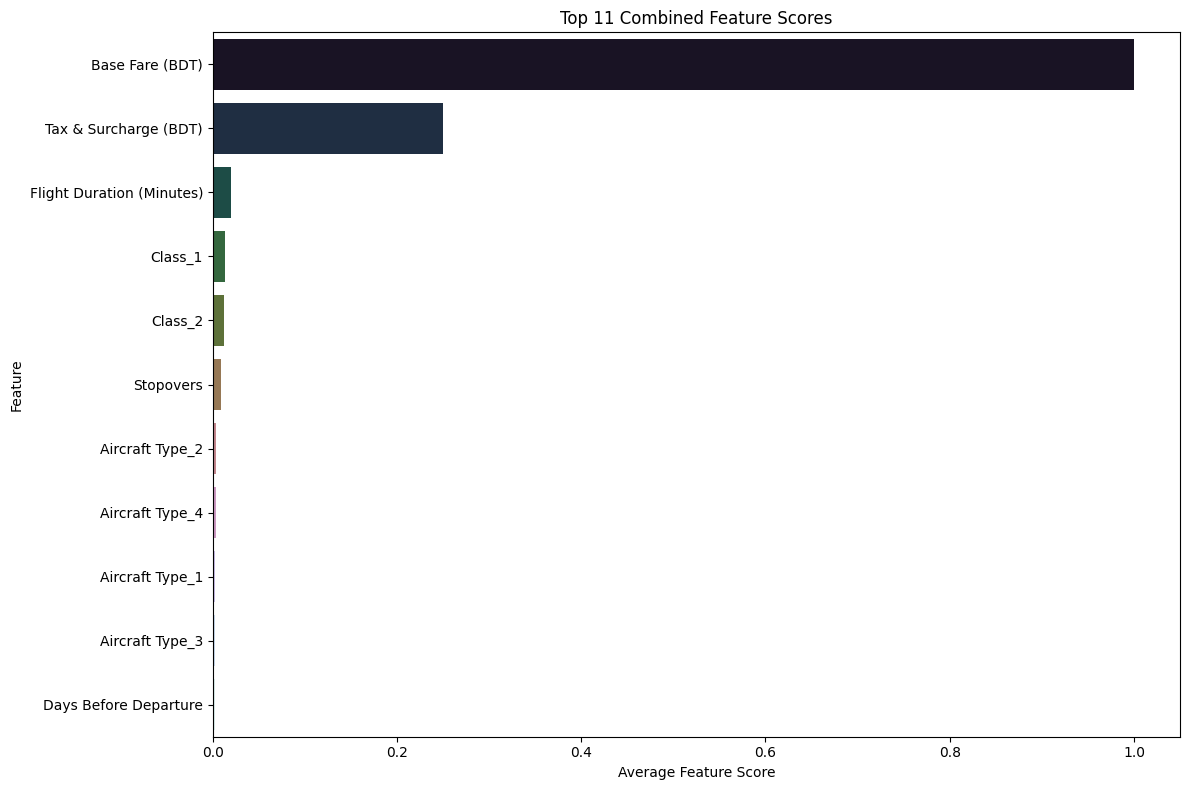

In [20]:
# Define features (X) and target (y)
X = df.drop('Total Fare (BDT)', axis=1)
y = df['Total Fare (BDT)']
# f_regression (Linear Relationship Strength)
f_scores, _ = f_regression(X, y)
f_score_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores})
# mutual_info_regression (Non-linear Relationship Strength)
mi_scores = mutual_info_regression(X, y)
mi_score_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
#Using Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_score_df = pd.DataFrame({'Feature': X.columns, 'RF_Importance': rf.feature_importances_})
#Using XGBOOST Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X, y)
xgb_score_df = pd.DataFrame({'Feature': X.columns, 'XGB_Importance': xgb.feature_importances_})
# Merge dataframes on 'Feature'
merged_scores = f_score_df.merge(mi_score_df, on='Feature')
merged_scores = merged_scores.merge(rf_score_df, on='Feature')  # or xgb_score_df
scaler = MinMaxScaler()
merged_scores[['F_Score', 'MI_Score', 'RF_Importance']] = scaler.fit_transform(
    merged_scores[['F_Score', 'MI_Score', 'RF_Importance']]
)
# Add an average score column
merged_scores['Average_Score'] = merged_scores[['F_Score', 'MI_Score', 'RF_Importance']].mean(axis=1)
top_features = merged_scores.sort_values(by='Average_Score', ascending=False).head(11)
#Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x='Average_Score', y='Feature', palette='cubehelix')
plt.title("Top 11 Combined Feature Scores")
plt.xlabel("Average Feature Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [22]:
#Selected Features
X_ann = X[top_features['Feature']]
X_ann.head()

,Base Fare (BDT),Tax & Surcharge (BDT),Flight Duration (Minutes),Class_1,Class_2,Stopovers,Aircraft Type_2,Aircraft Type_4,Aircraft Type_1,Aircraft Type_3,Days Before Departure
0,21131.225021,5169.683753,73.171587,1,0,0,0,0,0,0,10
1,11605.395471,200.000000,36.518281,0,1,0,0,0,0,0,14
2,39882.499349,11982.374902,161.379033,1,0,1,0,1,0,0,83
3,4435.607340,200.000000,41.163219,1,0,0,0,0,0,0,56
4,59243.806146,14886.570922,843.336554,0,0,1,0,0,1,0,90


In [23]:
# Ratio split of 70:15:15
X_train, X_test, y_train, y_test = train_test_split(X_ann, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Fitting the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output layer
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.3,
                    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11733562368.0000 - mae: 71212.6328 - val_loss: 11428301824.0000 - val_mae: 70355.0156
Epoch 2/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10597085184.0000 - mae: 67558.2969 - val_loss: 8401454592.0000 - val_mae: 60335.8477
Epoch 3/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7022567424.0000 - mae: 54762.5977 - val_loss: 4038386688.0000 - val_mae: 42183.4453
Epoch 4/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3187538688.0000 - mae: 37522.0234 - val_loss: 1666296960.0000 - val_mae: 28469.4727
Epoch 5/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1410269568.0000 - mae: 26223.4043 - val_loss: 984538688.0000 - val_mae: 22374.5664
Epoch 6/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 922769856.0000 - mae: 21557.6582 - val_loss: 748945984.0000 - val_mae: 19494.2832
Epoch 7/100
437/437 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 722621824.0000 - mae: 19117.1250 - val_loss: 588159744.0000 - val_mae

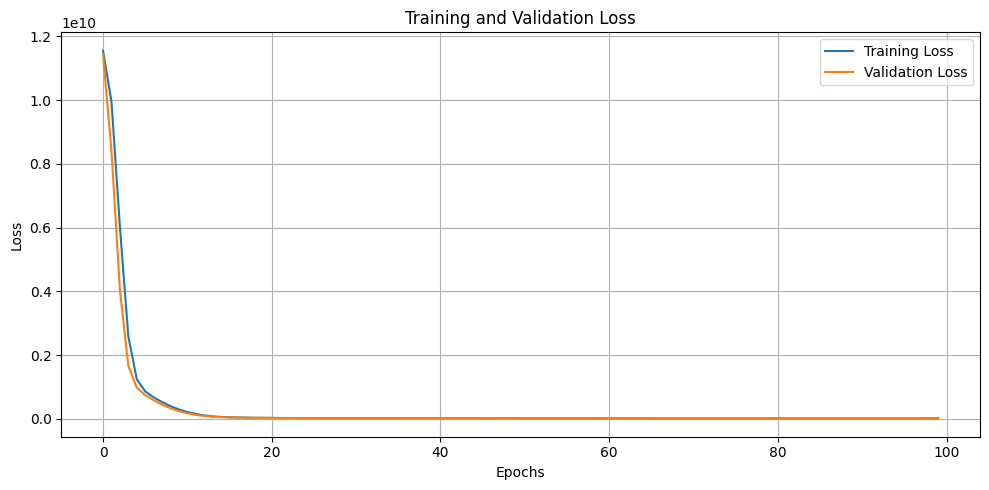

In [25]:
#Plotting the model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) on Test Set: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
R-squared (R²) on Test Set: 0.9969
Mean Absolute Error (MAE): 1887.45
Root Mean Squared Error (RMSE): 4606.61


<ipython-input-27-9b91b696eeea>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


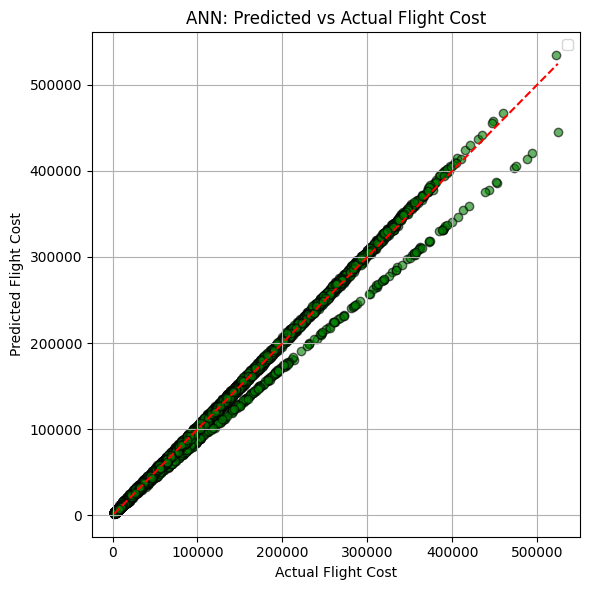

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Flight Cost")
plt.ylabel("Predicted Flight Cost")
plt.title("ANN: Predicted vs Actual Flight Cost")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RANDOM FOREST REGRESSION MODEL

In [28]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test_scaled)
# Metrics
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)
# Print evaluation results
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MAE: 56.48
Random Forest RMSE: 856.01
Random Forest R² Score: 0.9999


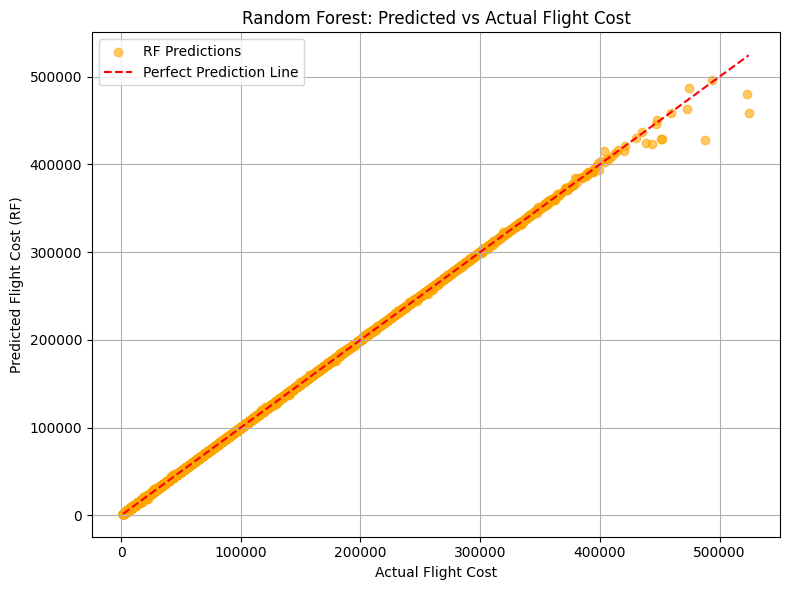

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.6, color='orange', label='RF Predictions')
# Reference line y = x
min_val = min(min(y_test), min(rf_y_pred))
max_val = max(max(y_test), max(rf_y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Flight Cost")
plt.ylabel("Predicted Flight Cost (RF)")
plt.title("Random Forest: Predicted vs Actual Flight Cost")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

XGB-BOOST REGRESSION MODEL

In [31]:
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# Fit the model
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
# Predict
xgb_y_pred = xgb_model.predict(X_test_scaled)
# Evaluation metrics
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_r2 = r2_score(y_test, xgb_y_pred)
# Print results
print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost MAE: 416.08
XGBoost RMSE: 1796.49
XGBoost R² Score: 0.9995


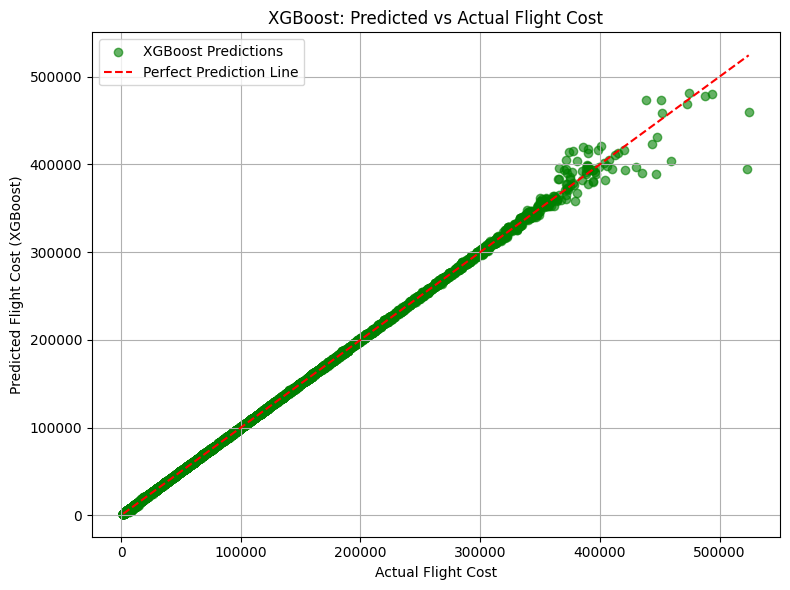

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_y_pred, alpha=0.6, color='green', label='XGBoost Predictions')
min_val = min(min(y_test), min(xgb_y_pred))
max_val = max(max(y_test), max(xgb_y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Flight Cost")
plt.ylabel("Predicted Flight Cost (XGBoost)")
plt.title("XGBoost: Predicted vs Actual Flight Cost")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

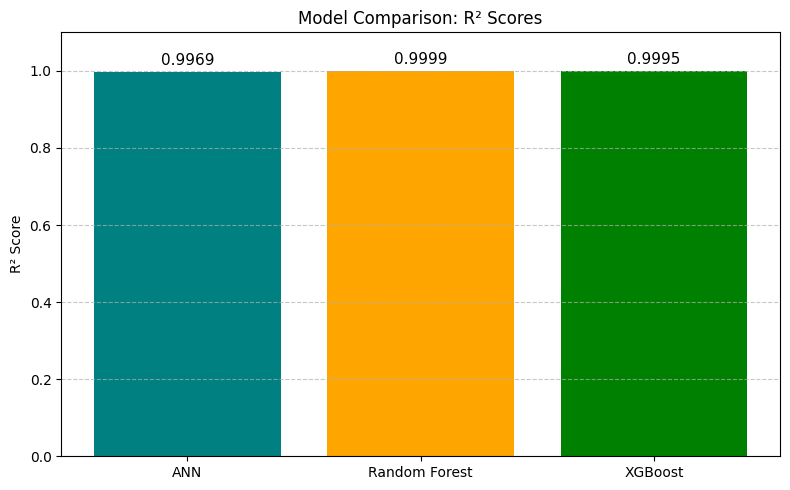

In [37]:
# R² Scores from previous models
r2_scores = {'ANN': r2,'Random Forest': rf_r2,'XGBoost': xgb_r2}
# Barplot
plt.figure(figsize=(8, 5))
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color=['teal', 'orange', 'green'])
# Annotate the bars with R² values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=11)
plt.ylim(0, 1.1)
plt.ylabel("R² Score")
plt.title("Model Comparison: R² Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()